In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Change directory to the desired folder
os.chdir("/mnt/e/Figure_files/Fig_5/Final/New folder/New folder/")


In [2]:

# Load and sort the data using only the file name
plasmid_data = pd.read_csv('Plasmid_Antibiotic_Binary_Matrix.csv')

# Sort by PCN (3rd column) from high to low
plasmid_data = plasmid_data.sort_values(
    by=plasmid_data.columns[2],  # 3rd column (0-indexed) is PCN
    ascending=False,
    ignore_index=True
)


         PCN                       plasmid_id
0  38.252128  IMGPR_plasmid_3300029482_000022
1  35.141573  IMGPR_plasmid_3300015184_000008
2  22.101577  IMGPR_plasmid_3300029841_000025
3  21.539163  IMGPR_plasmid_3300029878_000220
4  19.401465  IMGPR_plasmid_3300014927_000013
5  19.130789  IMGPR_plasmid_3300014546_000015
6  19.091889  IMGPR_plasmid_3300014571_000014
7  19.058512  IMGPR_plasmid_3300029843_000035
8  19.053726  IMGPR_plasmid_3300023312_000056
9  19.027676  IMGPR_plasmid_3300029757_000040


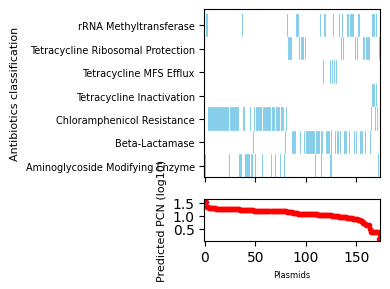

In [19]:

# Show top 10 plasmids by PCN
print(plasmid_data[[plasmid_data.columns[2], plasmid_data.columns[0]]].head(10))  # PCN and plasmid_id

# 2) Select columns - antibiotic columns are 4th to 10th (Python uses 0-indexing: 3 to 9)
heatmap_data = plasmid_data.iloc[:, 3:10]  # Antibiotic columns
seq_ids = plasmid_data.iloc[:, 0]         # 1st column is plasmid_id

# Extract PCN values and apply log10 transformation (to show the trend)
pcn_values = plasmid_data.iloc[:, 2].values  # 3rd column is PCN
pcn_values_log10 = np.log10(pcn_values)

# 3) Create the figure with two subplots (heatmap on top, PCN trend at bottom)
fig, (ax1, ax2) = plt.subplots(
    2, 1, 
    figsize=(4, 3),  # Adjusting the overall figure size to maintain the desired aspect ratio
    gridspec_kw={'height_ratios': [4, 1]},  # Heatmap takes up 4/6, and trend plot takes 2/6 of the height
    sharex=True
)

# 4) Draw heatmap on the top subplot using antibiotic resistance data
for i in range(heatmap_data.shape[1]):  # For each antibiotic
    for j in range(heatmap_data.shape[0]):  # For each plasmid
        if heatmap_data.iat[j, i] > 0:
            ax1.bar(j, 1,
                    bottom=i,
                    width=1.0,
                    color='skyblue',
                    align='center')

# Draw horizontal grid lines
for i in range(1, heatmap_data.shape[1]):
    ax1.axhline(i, color='white', linewidth=0.2)

# Label y-axis with antibiotic names
ax1.set_yticks(np.arange(heatmap_data.shape[1]) + 0.5)
ax1.set_yticklabels(heatmap_data.columns, fontsize=7)
ax1.set_xlim(-0.5, heatmap_data.shape[0] - 0.5)
ax1.set_ylim(0, heatmap_data.shape[1] + 0.2)
ax1.set_ylabel("Antibiotics classification", fontsize=8)

# 5) Draw log10 PCN trend line on bottom subplot
ax2.plot(np.arange(len(pcn_values_log10)), pcn_values_log10, 
         color='red', 
         linewidth=1.5,
         marker='o',
         markersize=3)

# Customize trend plot
ax2.set_ylabel("Predicted PCN (log10)", fontsize=8)
ax2.set_xlabel("Plasmids", fontsize=6)

# Adjust layout and save
plt.tight_layout()
output_dir = "/mnt/e/Figure_files/Fig_5/Final/New folder/New folder/"
plt.savefig(os.path.join(output_dir, 'Fig5e.png'), 
           format='png', dpi=1200)
plt.savefig(os.path.join(output_dir, 'Fig5e.pdf'), 
           format='pdf', dpi=1200)

plt.show()
